<a href="https://colab.research.google.com/github/ashtonmascarenhas05-spec/aqi-predictor-ml-model/blob/dif02/The_copy_of_AQI_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA**



In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
data = pd.read_excel("/content/drive/MyDrive/Copy of dhaka_air_quality_2000_2025.xlsx", engine="openpyxl")
df = data.copy()

In [5]:
df.head()

datetime         AQI      PM2.5        PM10         O3  \
0 2000-01-01 00:00:00  121.861086  44.200712   93.224101  20.586862   
1 2000-01-01 01:00:00   99.598077  35.212704   78.893066  22.429471   
2 2000-01-01 02:00:00  132.852834  48.575428  118.693959  37.838094   
3 2000-01-01 03:00:00  154.588259  64.208516   86.427166  26.747684   
4 2000-01-01 04:00:00  114.102260  41.112699   70.193382  33.192759   

         NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
0  15.391414  28.219932  1.049477    20.956667  71.272569    8.375675   
1  26.824534  24.385188  0.943859    13.761031  42.616871   10.880553   
2  33.403493  28.951413  0.887131    20.216907  59.169387   15.041183   
3  12.137395  26.950990  0.793261    18.642574  62.756439    9.904413   
4  25.313206  20.741976  1.059887    18.834718  56.369280   14.632070   

      Pressure  
0  1011.742574  
1  1010.949986  
2  1012.065387  
3  1010.162227  
4  1007.067421

In [6]:
df.tail()

datetime         AQI       PM2.5        PM10         O3  \
225811 2025-10-04 19:00:00  207.114725  157.607611  243.872762  46.377704   
225812 2025-10-04 20:00:00  206.927397  157.420470  243.006506  39.320982   
225813 2025-10-04 21:00:00  191.182348  133.664097  222.090884  47.043134   
225814 2025-10-04 22:00:00  176.907248  106.569957  169.771198  41.824699   
225815 2025-10-04 23:00:00  187.985824  127.597094  230.334810  38.649642   

              NO2        SO2        CO  Temperature   Humidity  Wind_Speed  \
225811  38.243954  26.807971  1.243414    28.259699  62.551322   11.818046   
225812  40.727546  35.334455  1.648275    24.709986  55.136078    8.800161   
225813  29.740886  31.693231  1.516578    23.832922  68.360762   13.813644   
225814  24.414738  28.654861  1.890719    23.119236  68.842075   11.024805   
225815  32.247229  22.446088  1.949910    19.342047  60.956672    8.055435   

           Pressure  
225811  1012.764603  
225812  1017.514260  
225813  1020.041276  
225814  1015.671335  
225815  1020.880531

In [7]:
df.index

RangeIndex(start=0, stop=225816, step=1)

In [8]:
df.columns

Index(['datetime', 'AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO',
       'Temperature', 'Humidity', 'Wind_Speed', 'Pressure'],
      dtype='object')

In [9]:
df.isnull().sum()

datetime       0
AQI            0
PM2.5          0
PM10           0
O3             0
NO2            0
SO2            0
CO             0
Temperature    0
Humidity       0
Wind_Speed     0
Pressure       0
dtype: int64

There are no NaN or missing values in the data

In [10]:
df.shape

(225816, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225816 entries, 0 to 225815
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   datetime     225816 non-null  datetime64[ns]
 1   AQI          225816 non-null  float64       
 2   PM2.5        225816 non-null  float64       
 3   PM10         225816 non-null  float64       
 4   O3           225816 non-null  float64       
 5   NO2          225816 non-null  float64       
 6   SO2          225816 non-null  float64       
 7   CO           225816 non-null  float64       
 8   Temperature  225816 non-null  float64       
 9   Humidity     225816 non-null  float64       
 10  Wind_Speed   225816 non-null  float64       
 11  Pressure     225816 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 20.7 MB


In [12]:
df.describe()

datetime            AQI          PM2.5           PM10  \
count               225816  225816.000000  225816.000000  225816.000000   
mean   2012-11-17 11:30:00     173.879455     105.495390     178.668865   
min    2000-01-01 00:00:00      20.833333       5.000000      10.000000   
25%    2006-06-10 05:45:00     153.495856      62.135134     105.427706   
50%    2012-11-17 11:30:00     171.495329      96.298134     164.382639   
75%    2019-04-27 17:15:00     194.740957     140.418337     240.081570   
max    2025-10-04 23:00:00     299.599600     250.000000     400.000000   
std                    NaN      47.853187      55.878730      95.030366   

                  O3            NO2            SO2             CO  \
count  225816.000000  225816.000000  225816.000000  225816.000000   
mean       50.070796      34.295663      23.082057       1.644556   
min         5.000000       5.000000       2.000000       0.100000   
25%        37.130329      25.622285      17.721737       1.256414   
50%        48.391279      33.784039      22.485259       1.612679   
75%        61.145886      42.605845      27.792577       2.012451   
max       124.493286      87.302685      57.272041       3.764566   
std        18.186844      12.189406       7.695508       0.535873   

         Temperature       Humidity     Wind_Speed       Pressure  
count  225816.000000  225816.000000  225816.000000  225816.000000  
mean       26.042161      70.020460      12.998380    1012.958425  
min        10.345658      30.000000       8.000005     990.000000  
25%        22.084894      62.332422       9.447585    1007.622862  
50%        26.067808      69.341643      11.473965    1012.991058  
75%        29.997338      77.493987      14.940992    1018.406142  
max        40.000000      95.000000      40.000000    1030.000000  
std         5.142185      10.623508       4.937334       7.866261

In [13]:
df['AQI'].median()

171.495328847568

In [14]:
df['AQI'].skew()

np.float64(0.11709852129898748)

<Axes: ylabel='Frequency'>

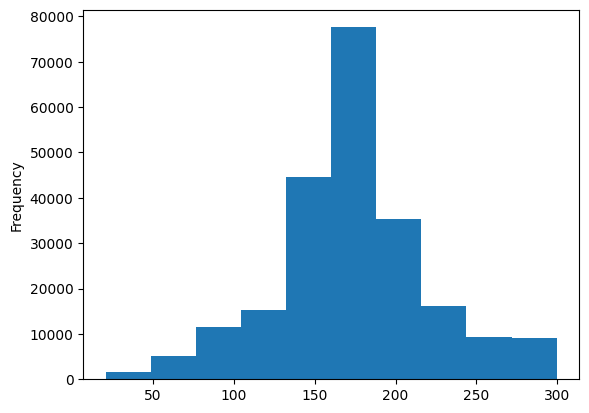

In [15]:
df['AQI'].plot(kind='hist')

<Axes: ylabel='Density'>

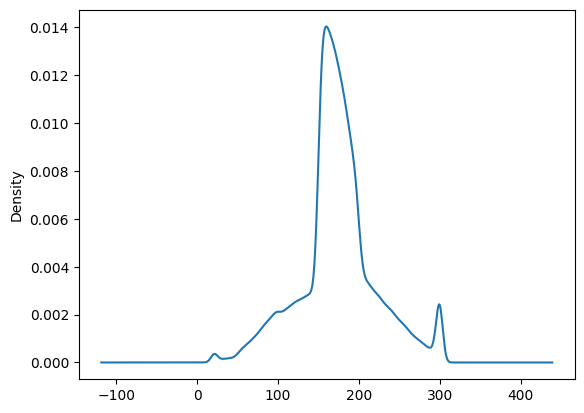

In [16]:
df['AQI'].plot(kind='kde')

The relation between AQI and PM2.5

In [17]:
df[['AQI','PM2.5']]

AQI       PM2.5
0       121.861086   44.200712
1        99.598077   35.212704
2       132.852834   48.575428
3       154.588259   64.208516
4       114.102260   41.112699
...            ...         ...
225811  207.114725  157.607611
225812  206.927397  157.420470
225813  191.182348  133.664097
225814  176.907248  106.569957
225815  187.985824  127.597094

[225816 rows x 2 columns]

<Axes: ylabel='Frequency'>

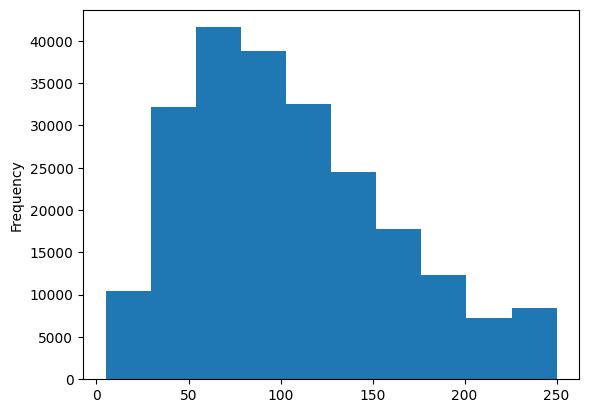

In [18]:
df['PM2.5'].plot(kind='hist')

<Axes: ylabel='Density'>

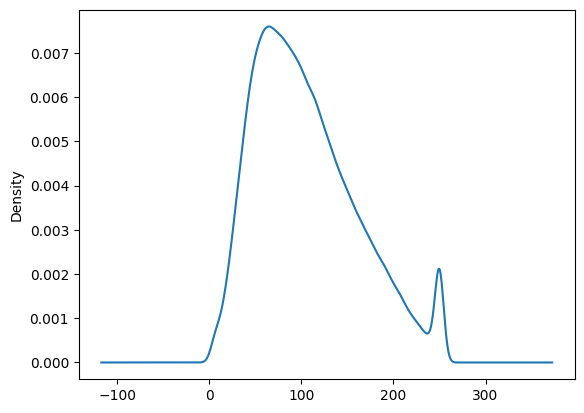

In [19]:
df['PM2.5'].plot(kind='kde')

In [20]:
df['PM2.5'].median()

96.2981341526845

In [21]:
df['PM2.5'].skew()

np.float64(0.6537130331589556)

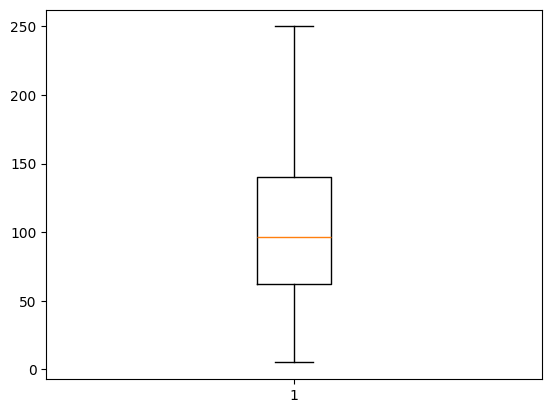

In [22]:
plt.boxplot(df['PM2.5'])
plt.show()

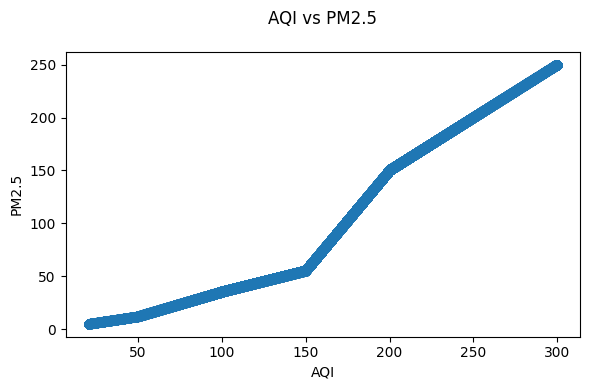

In [23]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(df['AQI'],df['PM2.5'])
ax.set_xlabel('AQI')
ax.set_ylabel('PM2.5')
ax.set_title('AQI vs PM2.5',pad = 20)
fig.tight_layout()
plt.show()

The relation between the AQI and the PM2.5 is almost linear<br>
Means as the value of PM2.5 increases the AQI also increases

The correlation between AQI and PM2.5

In [24]:
df['AQI'].corr(df['PM2.5'])

np.float64(0.9655355747990199)

we can clearly see that the there is strong positive linear relationship between AQI and PM2.5 as the value is close to 1 i.e 0.9655355747990199

<Axes: >

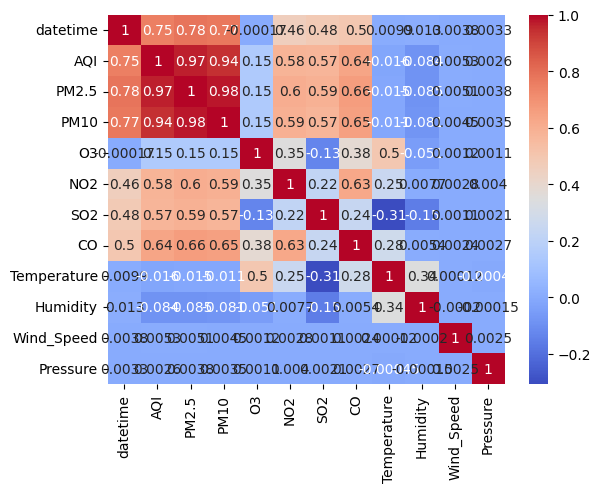

In [25]:
sns.heatmap(df.corr(),annot=True , cmap='coolwarm')

The relation between AQI and PM10

<Axes: ylabel='Frequency'>

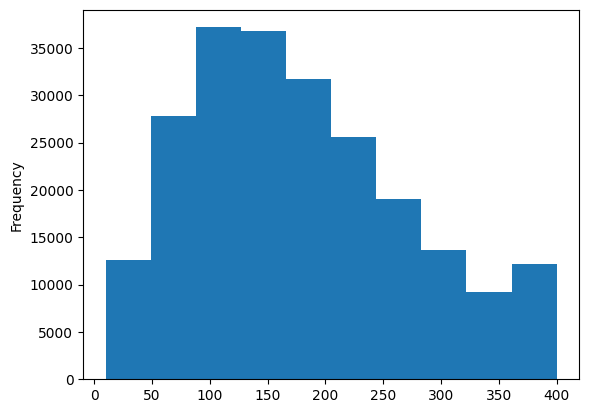

In [26]:
df['PM10'].plot(kind='hist')

<Axes: ylabel='Density'>

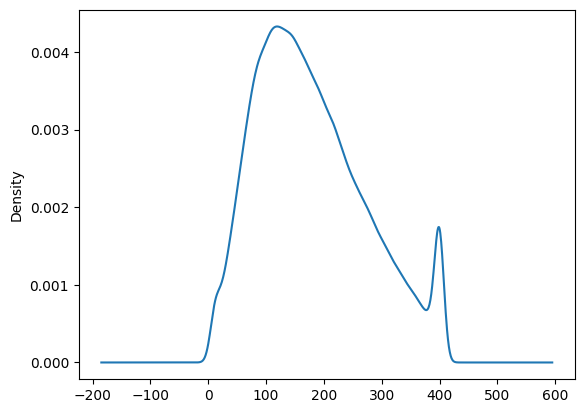

In [27]:
df['PM10'].plot(kind='kde')

In [28]:
df['PM10'].median()

164.3826387362005

In [29]:
df['PM10'].skew()

np.float64(0.5329578808271119)

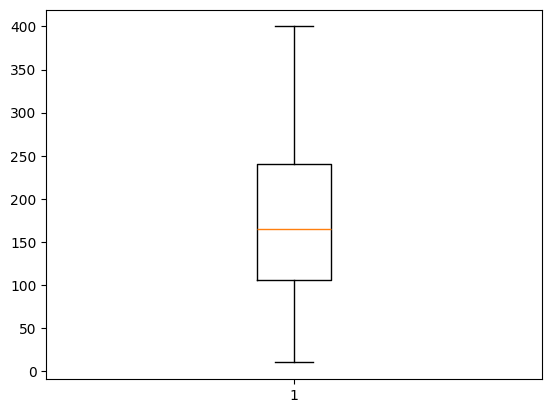

In [30]:
plt.boxplot(df['PM10'])
plt.show()

In [31]:
df[['AQI','PM10']]

AQI        PM10
0       121.861086   93.224101
1        99.598077   78.893066
2       132.852834  118.693959
3       154.588259   86.427166
4       114.102260   70.193382
...            ...         ...
225811  207.114725  243.872762
225812  206.927397  243.006506
225813  191.182348  222.090884
225814  176.907248  169.771198
225815  187.985824  230.334810

[225816 rows x 2 columns]

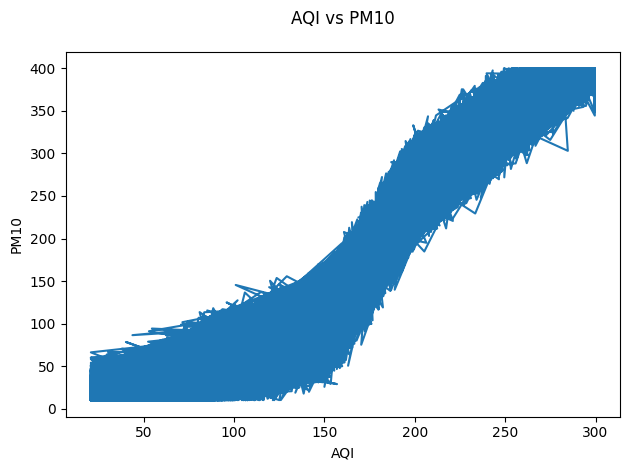

In [32]:
plt.plot(df['AQI'],df['PM10'])
plt.xlabel('AQI')
plt.ylabel('PM10')
plt.title('AQI vs PM10',pad=20)
plt.tight_layout()
plt.show()

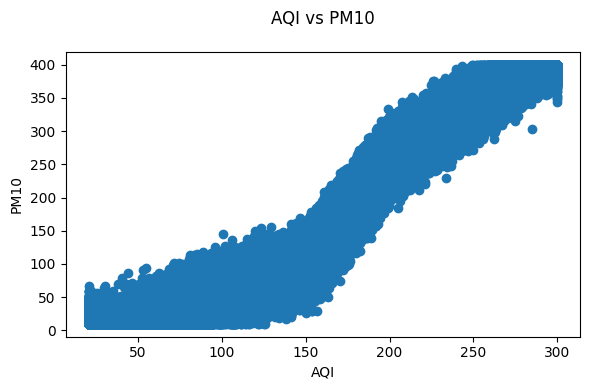

In [33]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(df['AQI'],df['PM10'])
ax.set_xlabel('AQI')
ax.set_ylabel('PM10')
ax.set_title('AQI vs PM10',pad = 20)
fig.tight_layout()
plt.show()

In [34]:
df['AQI'].corr(df['PM10'])

np.float64(0.9422410965417749)

As the value of PM10 increases the AQI also increases<br> This shows both PM2.5 and PM10 are major contributors to AQI

The relation between AQI and NO2


In [35]:
df[['AQI','NO2']]

AQI        NO2
0       121.861086  15.391414
1        99.598077  26.824534
2       132.852834  33.403493
3       154.588259  12.137395
4       114.102260  25.313206
...            ...        ...
225811  207.114725  38.243954
225812  206.927397  40.727546
225813  191.182348  29.740886
225814  176.907248  24.414738
225815  187.985824  32.247229

[225816 rows x 2 columns]

In [36]:
df['NO2'].median()

33.7840390835276

<Axes: ylabel='Frequency'>

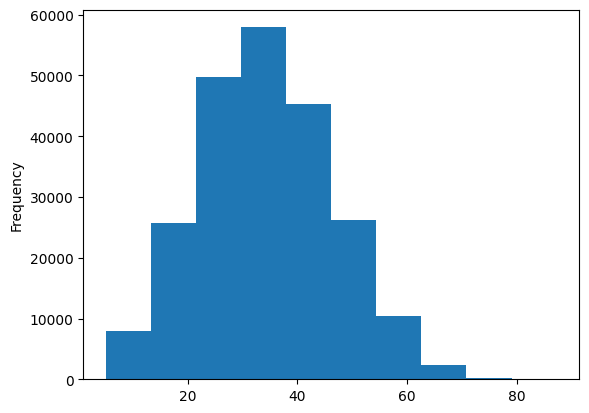

In [37]:
df['NO2'].plot(kind='hist')

<Axes: ylabel='Density'>

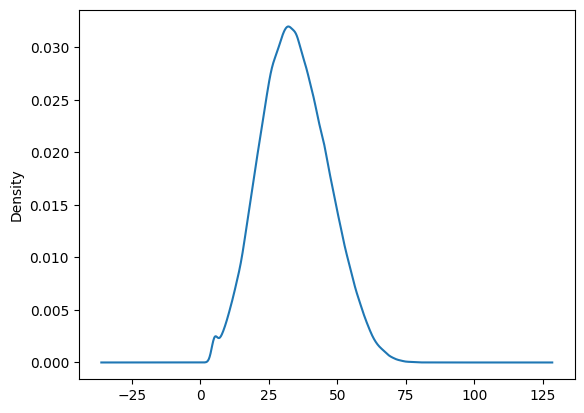

In [38]:
df['NO2'].plot(kind='kde')

In [39]:
df['NO2'].skew()

np.float64(0.1754337109383768)

<Axes: >

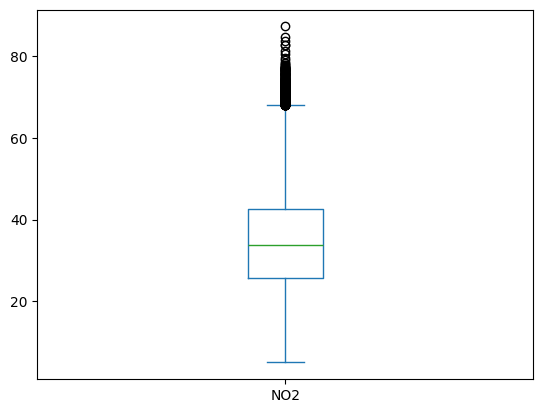

In [40]:
df['NO2'].plot(kind='box')

There is a cluster of upper-bound outliers starting above 70

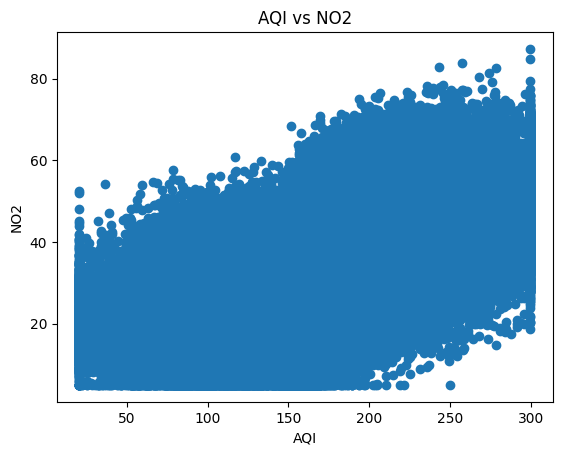

In [41]:
plt.scatter(df['AQI'], df['NO2'])
plt.xlabel('AQI')
plt.ylabel('NO2')
plt.title('AQI vs NO2')
plt.show()

The relation between the AQI and CO

In [42]:
df[['AQI','CO']]

AQI        CO
0       121.861086  1.049477
1        99.598077  0.943859
2       132.852834  0.887131
3       154.588259  0.793261
4       114.102260  1.059887
...            ...       ...
225811  207.114725  1.243414
225812  206.927397  1.648275
225813  191.182348  1.516578
225814  176.907248  1.890719
225815  187.985824  1.949910

[225816 rows x 2 columns]

<Axes: ylabel='Frequency'>

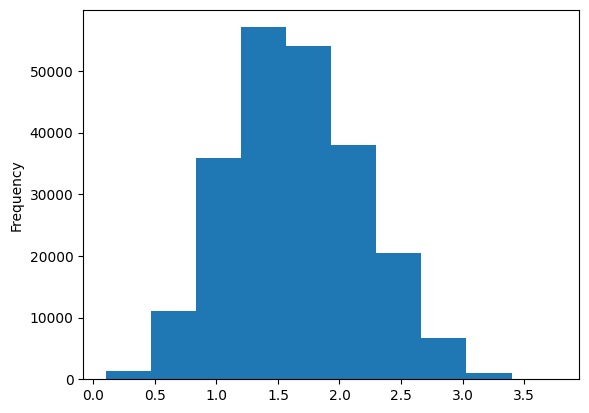

In [43]:
df['CO'].plot(kind='hist')

<Axes: ylabel='Density'>

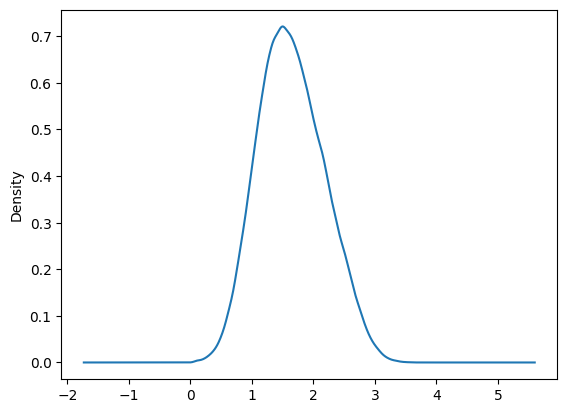

In [44]:
df['CO'].plot(kind='kde')

In [45]:
df['CO'].median()

1.6126791371152551

In [46]:
df['CO'].skew()

np.float64(0.21381005116483956)

<Axes: >

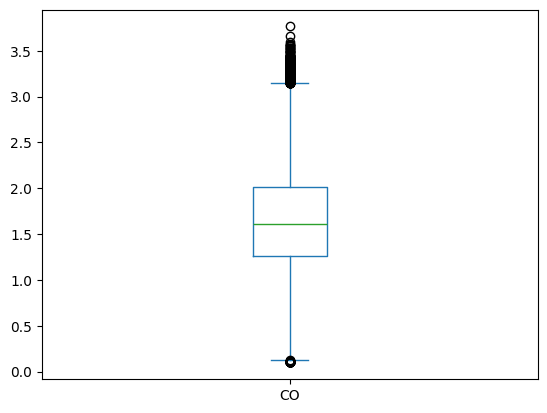

In [47]:
df['CO'].plot(kind='box')

There are outliers on both sides, but the upper ones are much more frequent

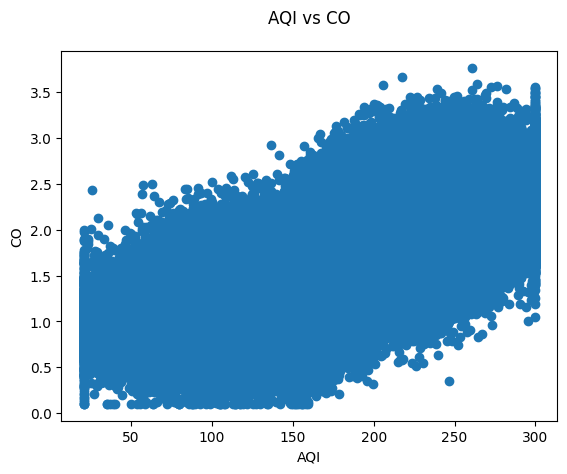

In [49]:
plt.scatter(df['AQI'], df['CO'])
plt.xlabel('AQI')
plt.ylabel('CO')
plt.title('AQI vs CO',pad=20)
plt.show()

In [48]:
df.corr()['AQI'].sort_values(ascending=False)

AQI            1.000000
PM2.5          0.965536
PM10           0.942241
datetime       0.750163
CO             0.635649
NO2            0.581389
SO2            0.571672
O3             0.148527
Wind_Speed     0.005324
Pressure       0.002627
Temperature   -0.015848
Humidity      -0.084323
Name: AQI, dtype: float64

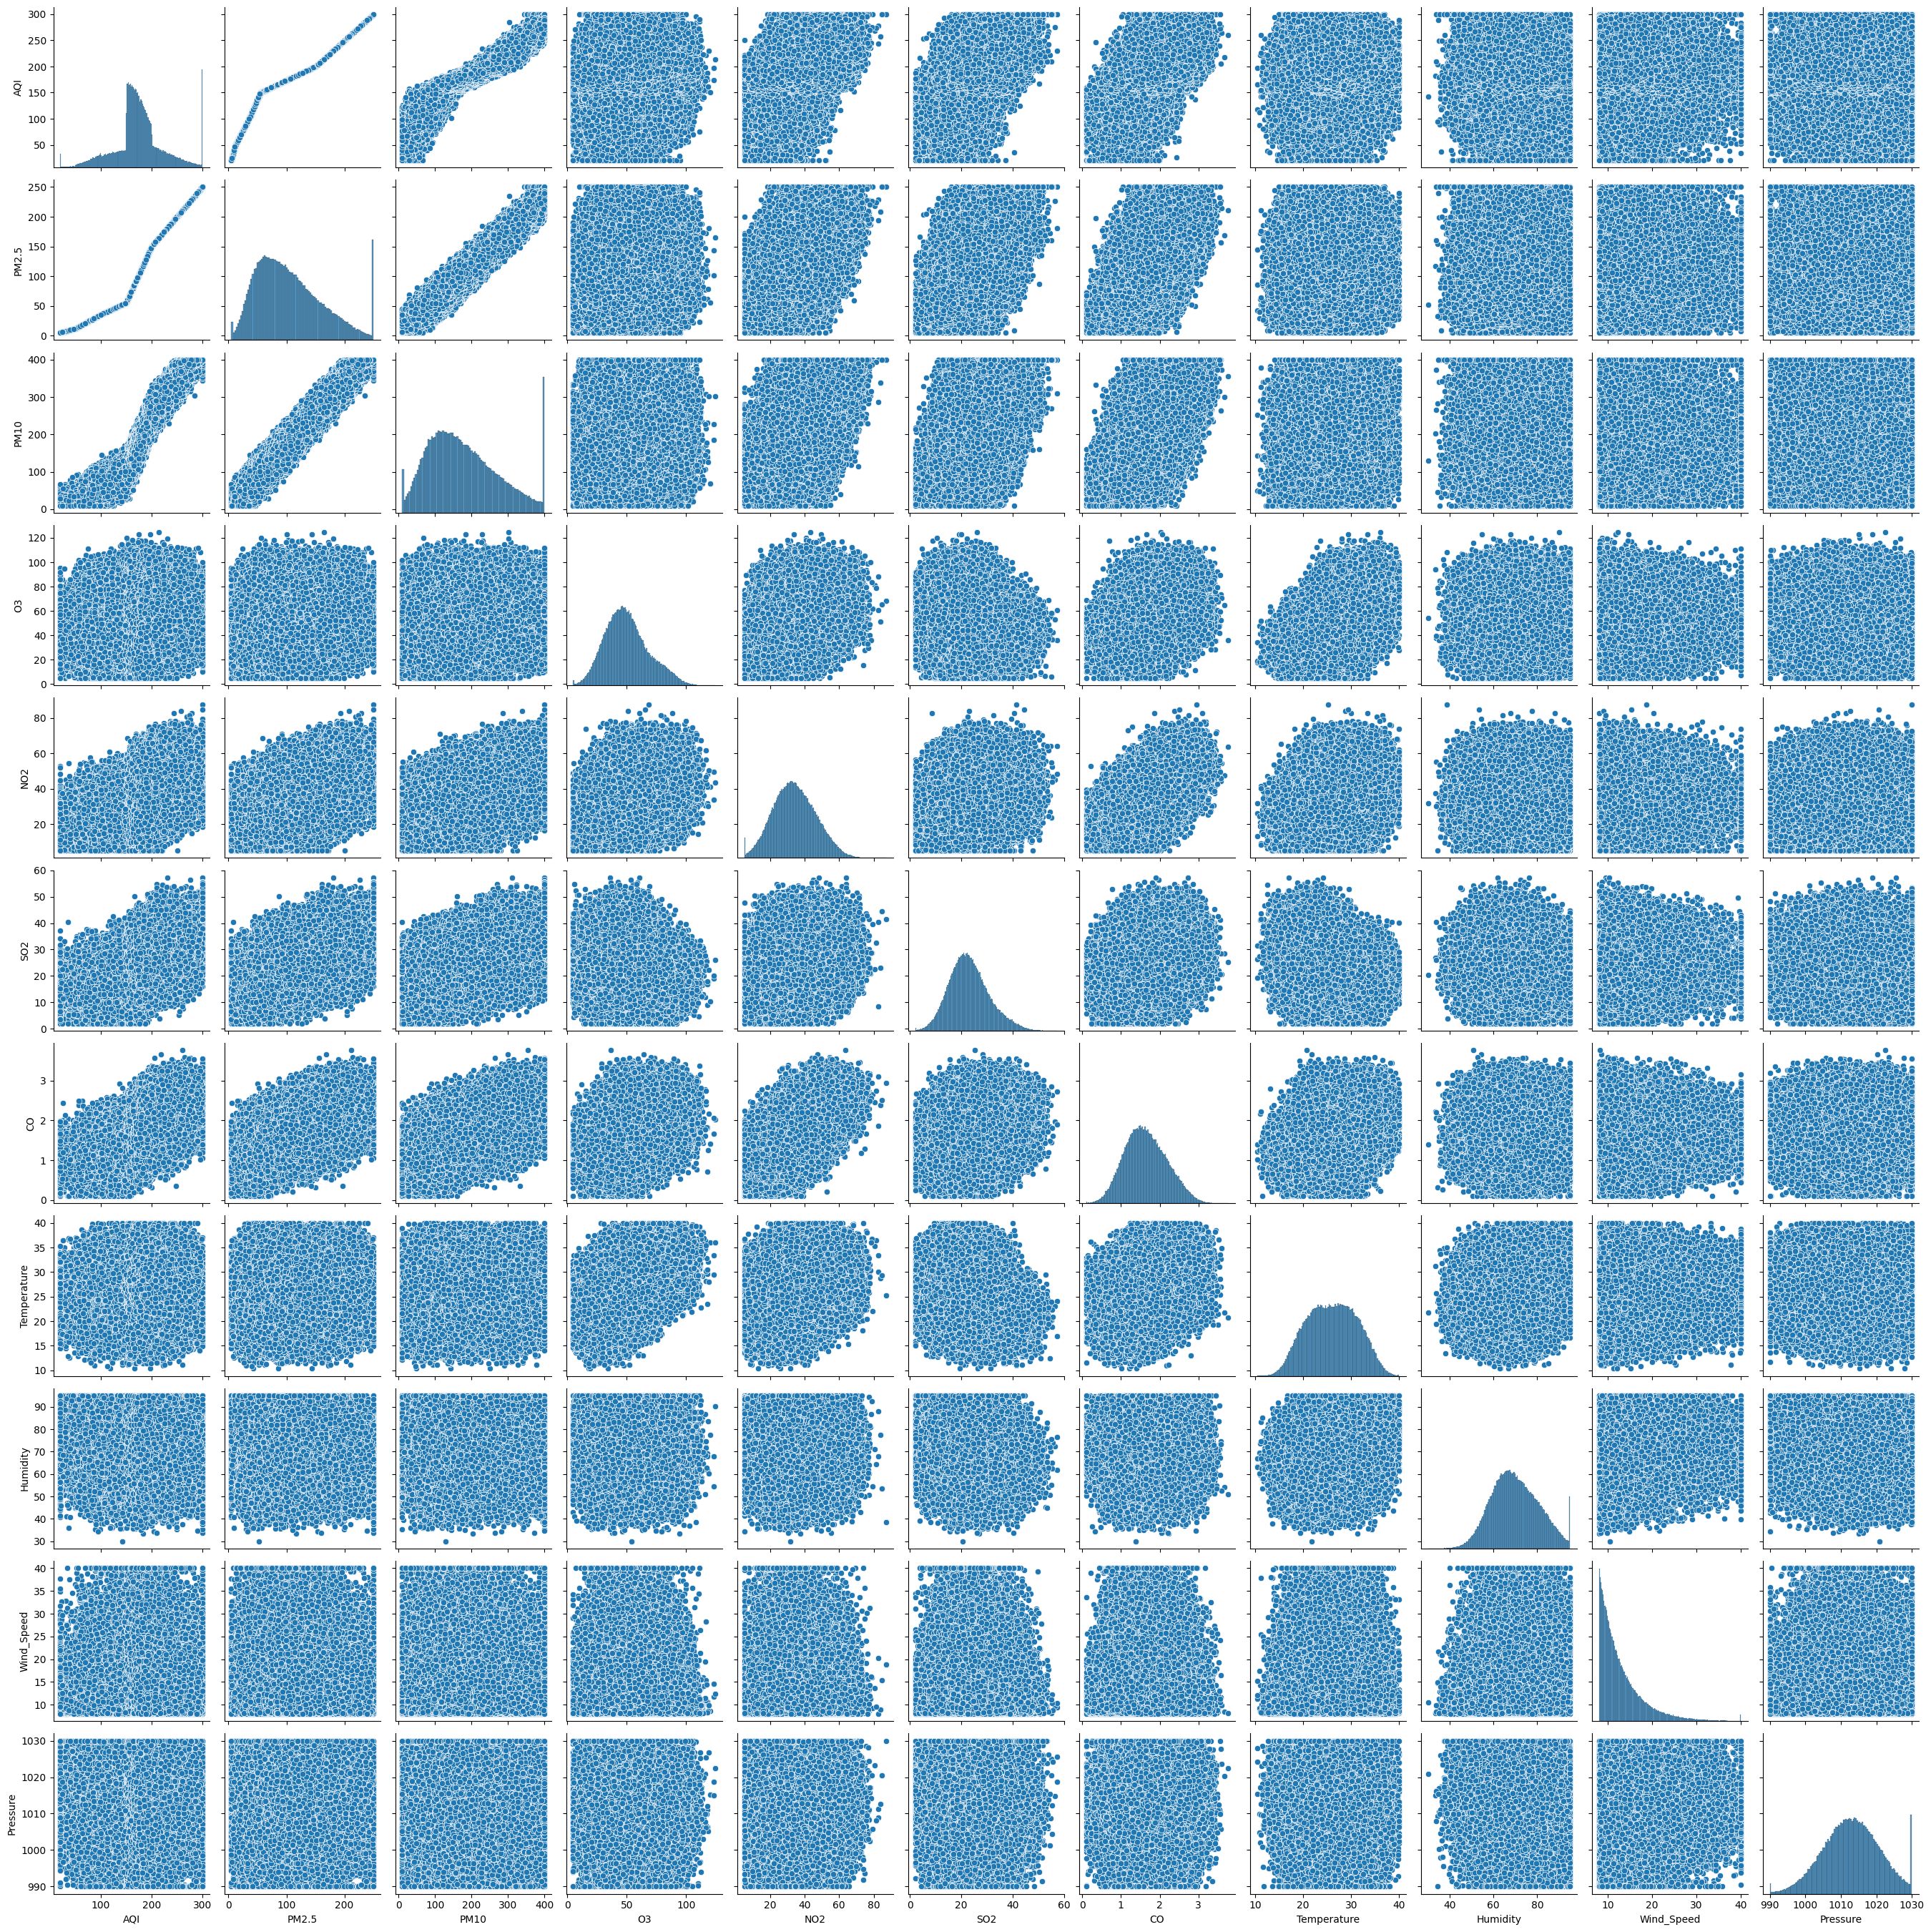

In [50]:
sns.pairplot(df)
plt.show()

The relation of AQI with time

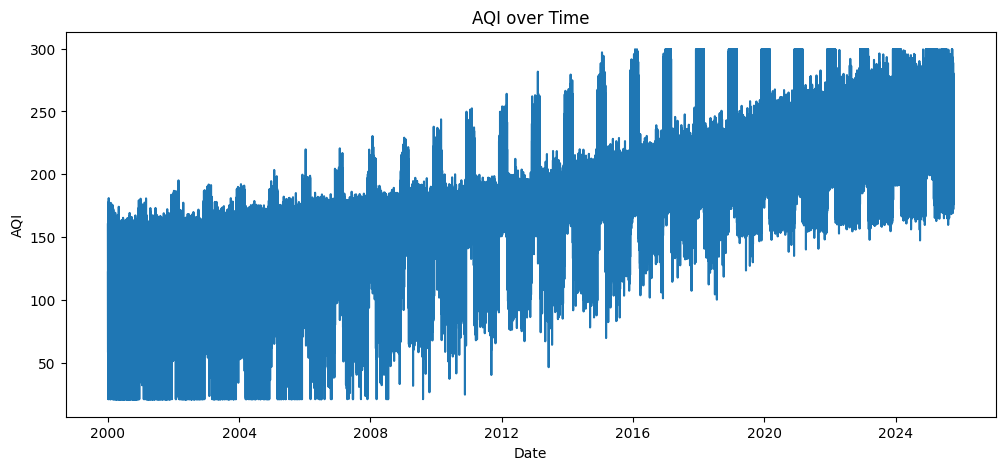

In [51]:
df['datetime'] = pd.to_datetime(df['datetime'])
plt.figure(figsize=(12,5))
plt.plot(df['datetime'], df['AQI'])
plt.title('AQI over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

The AQI generally increases over time but we can see the spikes showing the seasonality